## Ensemble Learning

Trog notebook này, chúng ta sẽ so sánh chất lượng của:

- re-sampling
- boosting hoặc bagging
- bagging + resamppling
- boosting + resampling
- bagging + boosting + resampling

Sử dụng các lớp từ sklearn và imblearn trên nhiều tập dữ liệu.

In [1]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
)

from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.datasets import fetch_datasets

from imblearn.under_sampling import RandomUnderSampler

from imblearn.over_sampling import SMOTE

from imblearn.ensemble import (
    BalancedBaggingClassifier,
    BalancedRandomForestClassifier,
    RUSBoostClassifier,
    EasyEnsembleClassifier,
)

In [2]:
# phương pháp re-sampling (không có bộ phân loại)

resampling_dict = {
    
    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False,
    ),

    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        n_jobs=4,
    ),
}

In [3]:
# phương pháp ensemble (có/không có resampling)

ensemble_dict = {

    # balanced random forest (bagging)
    'balancedRF': BalancedRandomForestClassifier(
        n_estimators=20,
        criterion='gini',
        max_depth=3,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),

    # bagging của hồi quy Logistic, không resampling
    'bagging': BaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        n_jobs=4,
        random_state=2909,
    ),

    # bagging của hồi quy Logistic với resampling
    'balancedbagging': BalancedBaggingClassifier(
        base_estimator=LogisticRegression(random_state=2909),
        n_estimators=20,
        max_samples=1.0,  # Số mẫu cần lấy từ X để huấn luyện từng base estimator
        bootstrap=True,
        bootstrap_features=False,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),

    # boosting + undersampling
    'rusboost': RUSBoostClassifier(
        base_estimator=None,
        n_estimators=20,
        learning_rate=1.0,
        sampling_strategy='auto',
        random_state=2909,
    ),

    # bagging + boosting + under-sammpling
    'easyEnsemble': EasyEnsembleClassifier(
        n_estimators=20,
        sampling_strategy='auto',
        n_jobs=4,
        random_state=2909,
    ),
}

In [4]:
datasets_ls = [
    'car_eval_34',
    'ecoli',
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

In [5]:
# hàm để huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):
    ## Yêu cầu 1:
    ## VIẾT CODE Ở ĐÂY:
    rf = RandomForestClassifier(
        n_estimators=20, random_state=39, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = rf.predict_proba(X_train)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số huấn luyện
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = rf.predict_proba(X_test)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số kiểm tra
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    # trả về roc-auc của tập kiểm tra
    return roc_auc_score(y_test, pred[:, 1])

<details><summary> Gợi ý </summary>

[RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

</details>

In [6]:
# hàm để huấn luyện random forest và đánh giá chất lượng

def run_adaboost(X_train, X_test, y_train, y_test):
    ## Yêu cầu 2:
    ## VIẾT CODE Ở ĐÂY:
    ada = AdaBoostClassifier(n_estimators=20, random_state=2909)
    
    ada.fit(X_train, y_train)

    print('Train set')
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = ada.predict_proba(X_train)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số huấn luyện
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = ada.predict_proba(X_test)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số kiểm tra
    print(
        'AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    # trả về roc-auc của tập kiểm tra
    return roc_auc_score(y_test, pred[:, 1])

<details><summary> Gợi ý </summary>

[AdaBoostClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

</details>

In [7]:
# hàm để huấn luyện random forest và đánh giá chất lượng ensemble

def run_ensemble(ensemble, X_train, X_test, y_train, y_test):
    
    ensemble.fit(X_train, y_train)

    ## Yêu cầu 3:
    ## VIẾT CODE Ở ĐÂY:

    print('Train set')
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = ensemble.predict_proba(X_train)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số huấn luyện
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    # tính xác suất của dự đoán (sử dụng 'predict_proba')
    pred = ensemble.predict_proba(X_test)
    # sử dụng 'roc_auc_score' từ sklearn để in hệ số kiểm tra
    print(
        'ensembleBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    # trả về roc-auc của tập kiểm tra
    return roc_auc_score(y_test, pred[:, 1])

In [8]:
# lưu kết quả
results_dict = {}

## Yêu cầu 4:
## VIẾT CODE Ở ĐÂY:

for dataset in datasets_ls:
    
    results_dict[dataset] = {}    
    print(dataset)
    
    # load tập dữ liệu
    data = fetch_datasets()[dataset]
    
    # tách thành tập huấn luyện và kiểm tra (sử dụng 'train_test_split')
    X_train, X_test, y_train, y_test = train_test_split(
    data.data,  
    data.target, 
    test_size=0.3,
    random_state=0)
    
    # đặt các biến trong cùng một tỷ lệ
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # huấn luyện mô hình và lưu trữ kết quả 
    roc = run_randomForests(X_train, X_test, y_train, y_test)
    results_dict[dataset]['full_data'] = roc
    print()
    
    # huấn luyện mô hình và lưu trữ kết quả
    roc = run_adaboost(X_train, X_test, y_train, y_test)
    results_dict[dataset]['full_data_adaboost'] = roc
    print()
    
    for sampler in resampling_dict.keys():
        
        print(sampler)
        
        # resample
        X_resampled, y_resampled = resampling_dict[sampler].fit_resample(X_train, y_train)
        
        # huấn luyện mô hình và lưu trữ kết quả
        roc = run_randomForests(X_train, X_test, y_train, y_test)
        results_dict[dataset][sampler] = roc
        print()
    
    for ensemble in ensemble_dict.keys():
        
        print(ensemble)
        
        # huấn luyện mô hình và lưu trữ kết quả
        roc = run_ensemble(ensemble_dict[ensemble], X_train,  X_test, y_train, y_test)
        results_dict[dataset][ensemble] = roc
        print()
        

car_eval_34
Train set
Random Forests roc-auc: 0.9513383050063591
Test set
Random Forests roc-auc: 0.9351974691295031

Train set
AdaBoost roc-auc: 0.9987040891047134
Test set
AdaBoost roc-auc: 0.9961985916930298

random
Train set
Random Forests roc-auc: 0.9513383050063591
Test set
Random Forests roc-auc: 0.9351974691295031

smote
Train set
Random Forests roc-auc: 0.9513383050063591
Test set
Random Forests roc-auc: 0.9351974691295031

balancedRF
Train set
ensembleBoost roc-auc: 0.9919499364088333
Test set
ensembleBoost roc-auc: 0.9923971833860598

bagging
Train set
ensembleBoost roc-auc: 0.9987281766678229
Test set
ensembleBoost roc-auc: 0.9969894887233391

balancedbagging
Train set
ensembleBoost roc-auc: 0.9980440898755155
Test set
ensembleBoost roc-auc: 0.9962751301153179

rusboost
Train set
ensembleBoost roc-auc: 0.9975286160249739
Test set
ensembleBoost roc-auc: 0.9960455148484539

easyEnsemble
Train set
ensembleBoost roc-auc: 0.9983813157590472
Test set
ensembleBoost roc-auc: 0.9955

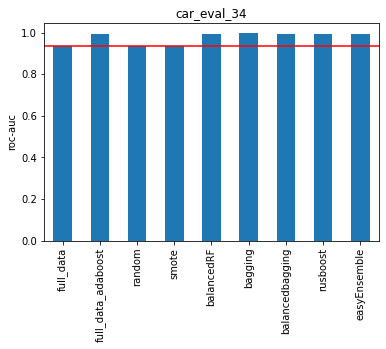

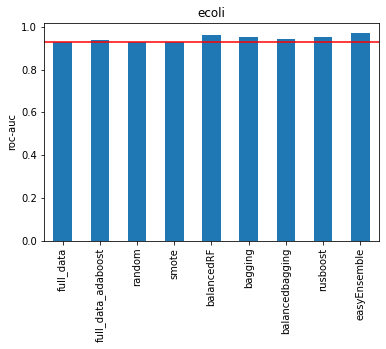

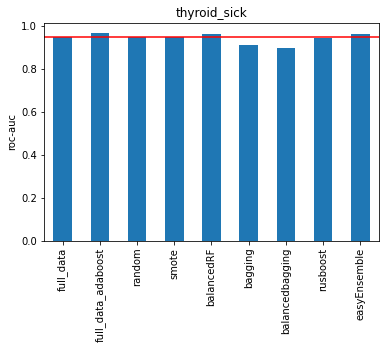

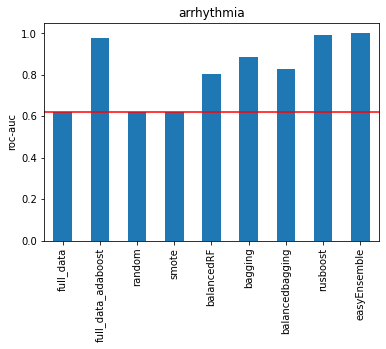

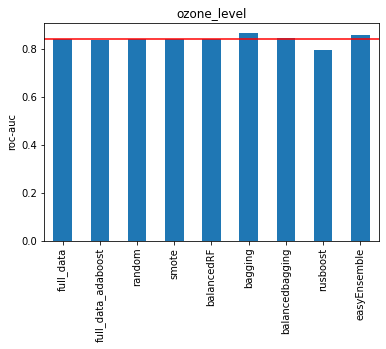

In [9]:
for dataset in datasets_ls:
    ## Yêu cầu 5:
    ## VIẾT CODE Ở ĐÂY:
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

<details><summary> Gợi ý </summary>

[bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

</details>

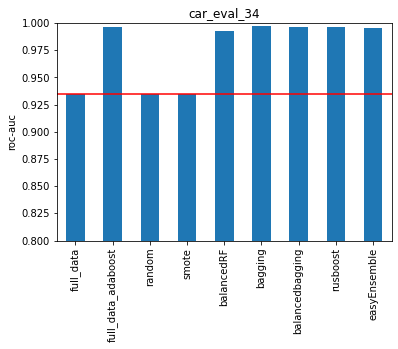

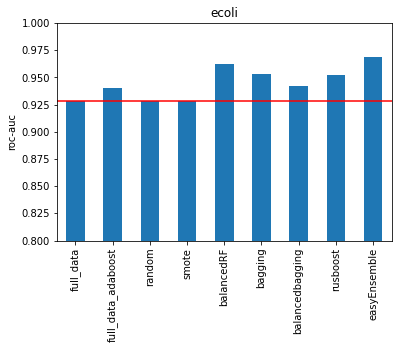

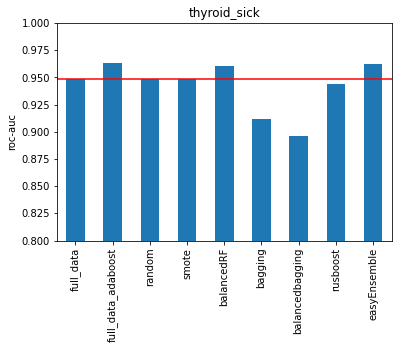

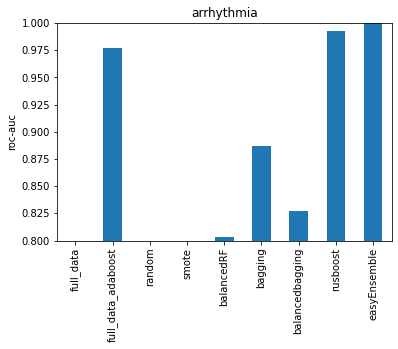

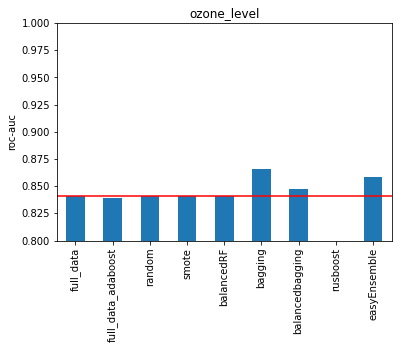

In [10]:
for dataset in datasets_ls:
    ## Yêu cầu 5:
    ## VIẾT CODE Ở ĐÂY:
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.ylim(0.8, 1)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

<details><summary> Gợi ý </summary>

[bar()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

</details>

Chúng ta thấy rằng thuật toán boosting có hướng hoạt động tốt hơn thuật toán bagging, và kết hợp resampling với bagging nhìn chung có cải thiện chất lượng một chút.

Lưu ý rằng tôi đang so sánh các mô hình chuẩn cho từng ensemble. Nếu chúng ta dành chút thời gian để tối ưu hóa các tham số thì chắc chắn chúng ta sẽ nhận được các mô hình tốt hơn với từng triển khai này. Hãy coi đó là bài tập của các bạn.


In [11]:
1+1

2